In [2]:
import seaborn as sns
import pandas as pd
from collections import  Counter
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('../../../soil-prediction/iPAGE SoilData.csv')
df = df.drop('Data Collection Year', axis=1)
df = df.fillna('UNK')

## filter out outliers (get this from visualization)

df = df[df['SOC (%)'] < 10]
df = df[df['Nitrogen N (%)'] < 0.3]
df = df[df['Potassium K (meq/100)'] < 10]

In [54]:
df.describe()

,pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5.237896,1.763292,0.088470,0.218091,31.150718,15.369230,0.349184,1.039233
std,0.469753,0.714738,0.043599,0.148963,38.149811,11.062643,0.259116,0.975730
min,4.100000,0.100000,0.000000,0.000000,0.000000,0.650000,0.000000,0.080000
25%,4.900000,1.350000,0.070000,0.110000,8.780000,8.800000,0.230000,0.520000
50%,5.200000,1.700000,0.090000,0.170000,16.000000,12.700000,0.300000,0.820000
75%,5.400000,2.160000,0.110000,0.280000,37.400000,19.000000,0.400000,1.100000
max,7.800000,5.250000,0.250000,1.010000,254.700000,85.000000,2.660000,10.580000


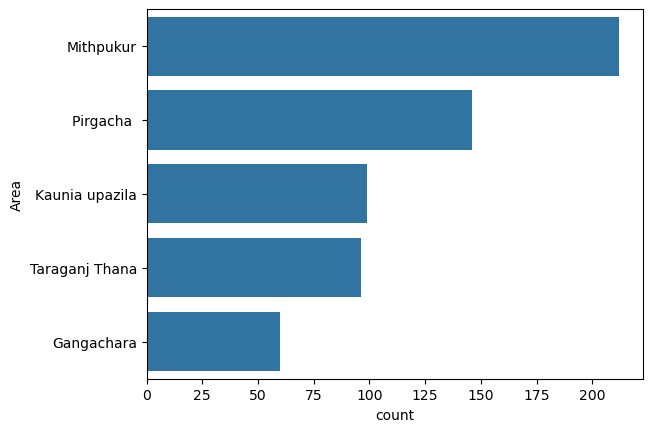

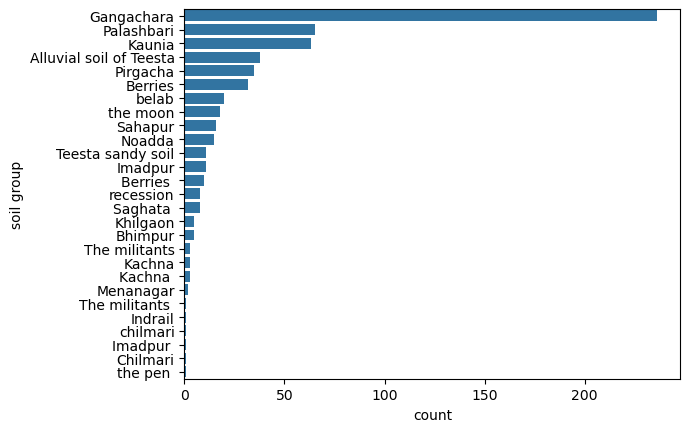

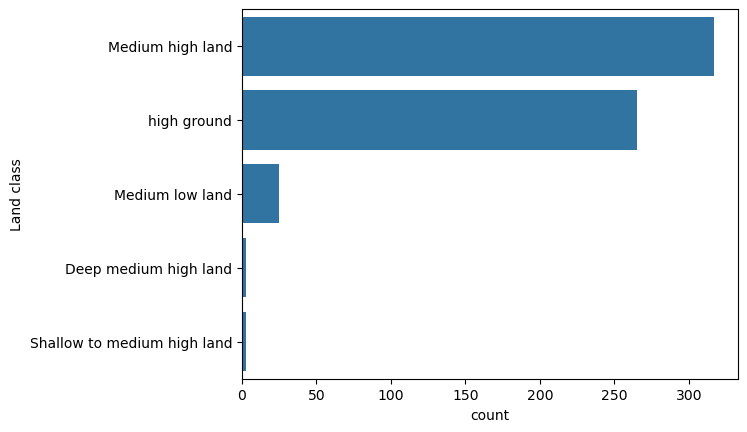

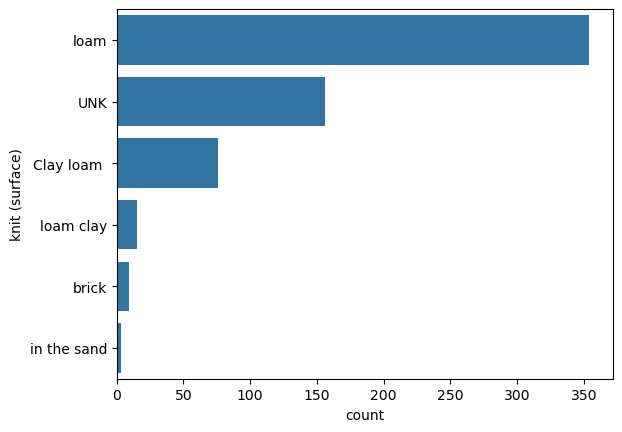

In [55]:
cat_cols = ['Area', 'soil group', 'Land class', 'knit (surface)']

for col in cat_cols:
    sample_count = df.groupby(col).size().reset_index()
    sample_count.columns = [col, 'count']
    sample_count = sample_count.sort_values(by = 'count', ascending=False)
    plt.figure()
    sns.barplot(data = sample_count, x = 'count', y = col)    
    # print(col, ':', df[col].unique().tolist())
    # sample_count = dict(Counter(df[col].tolist()))
    # # sample_count = pd.DataFrame.from_dict(data=sample_count, columns=['type','count'])
    # print(sample_count)
    plt.show()

In [56]:
df.isna().sum(axis=0)

Area                     0
soil group               0
Land class               0
knit (surface)           0
pH                       0
SOC (%)                  0
Nitrogen N (%)           0
Potassium K (meq/100)    0
Phosphorus P (ug/g)      0
Sulfur S (ug/g)          0
Boron B (ug/g)           0
Zinc Zn (ug/g)           0
dtype: int64

In [57]:
df.head(10)

,Area,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,belab,high ground,Clay loam,5.0,1.270,0.08,0.15,19.60,37.7,0.26,0.86
1,Mithpukur,belab,high ground,Clay loam,4.9,1.470,0.09,0.25,4.10,32.0,0.25,0.75
2,Mithpukur,belab,high ground,Clay loam,4.6,1.070,0.05,0.09,13.30,13.5,0.27,0.95
3,Mithpukur,belab,high ground,Clay loam,5.2,1.510,0.06,0.30,20.20,30.0,0.28,1.00
4,Mithpukur,belab,high ground,Clay loam,5.3,1.080,0.11,0.17,20.50,27.8,0.30,1.04
5,Mithpukur,belab,high ground,Clay loam,4.9,1.870,0.08,0.35,21.70,27.8,0.32,1.16
6,Mithpukur,belab,high ground,Clay loam,4.8,1.110,0.06,0.29,7.70,39.7,0.20,0.88
7,Mithpukur,belab,high ground,Clay loam,5.2,1.510,0.08,0.50,18.50,25.6,0.26,1.05
8,Mithpukur,Noadda,high ground,Clay loam,5.3,1.590,0.08,0.17,12.00,26.4,0.24,0.74
9,Mithpukur,Noadda,high ground,Clay loam,5.0,1.121,0.06,0.18,0.06,10.7,0.20,0.91


In [58]:
def plot_num_val_with_target(num_col, target_col):
    sns.scatterplot(data = df, x = num_col, y=target_col)

    r2 = df[num_col].corr(df[target_col])

    print('R2 between {} and {} is {}'.format(num_col, target_col, round(r2,2)))

In [59]:
num_cols = ['pH', 'Nitrogen N (%)', 'Phosphorus P (ug/g)', 'Potassium K (meq/100)', 'Sulfur S (ug/g)']
target_cols = ['SOC (%)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']

In [60]:
melt_df_by_num_cols = pd.melt(df, id_vars=target_cols + cat_cols)
melt_df_by_cat_cols = pd.melt(df[cat_cols + target_cols], id_vars=target_cols)

melt_df_by_num_cols['value'] = melt_df_by_num_cols['value'].astype(float)

In [61]:
melt_df_by_num_cols

,SOC (%),Boron B (ug/g),Zinc Zn (ug/g),Area,soil group,Land class,knit (surface),variable,value
0,1.27,0.26,0.86,Mithpukur,belab,high ground,Clay loam,pH,5.0
1,1.47,0.25,0.75,Mithpukur,belab,high ground,Clay loam,pH,4.9
2,1.07,0.27,0.95,Mithpukur,belab,high ground,Clay loam,pH,4.6
3,1.51,0.28,1.00,Mithpukur,belab,high ground,Clay loam,pH,5.2
4,1.08,0.30,1.04,Mithpukur,belab,high ground,Clay loam,pH,5.3
...,...,...,...,...,...,...,...,...,...
3060,0.48,0.20,1.04,Taraganj Thana,Teesta sandy soil,Medium high land,UNK,Sulfur S (ug/g),12.0
3061,0.36,0.20,0.36,Taraganj Thana,Teesta sandy soil,Medium high land,UNK,Sulfur S (ug/g),7.0
3062,0.73,0.37,0.44,Taraganj Thana,Alluvial soil of Teesta,Medium high land,UNK,Sulfur S (ug/g),9.0
3063,0.36,0.24,1.02,Taraganj Thana,Teesta sandy soil,Medium low land,UNK,Sulfur S (ug/g),9.0


## The relationship between independent variables and SOC (%)

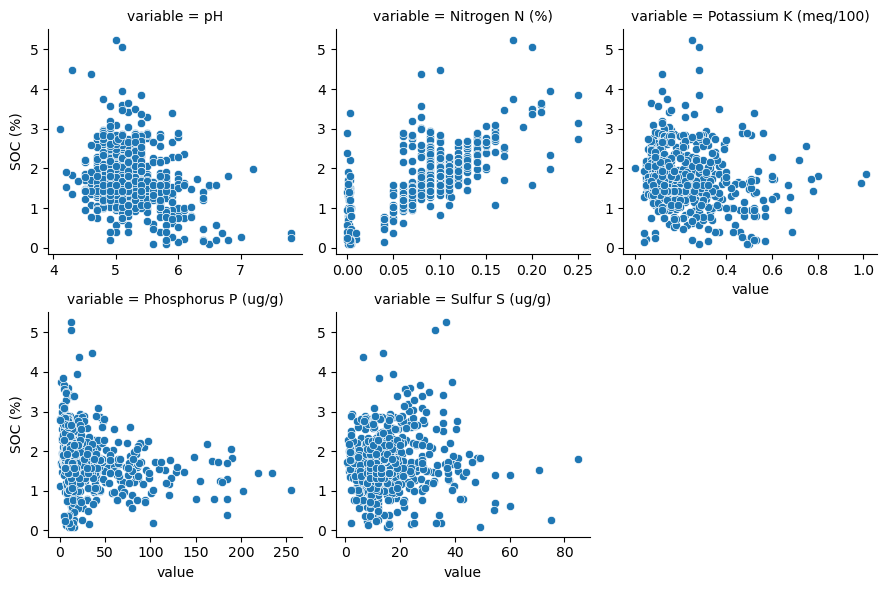

In [62]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "SOC (%)")
# g.add_legend()

/Users/cpor0006/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


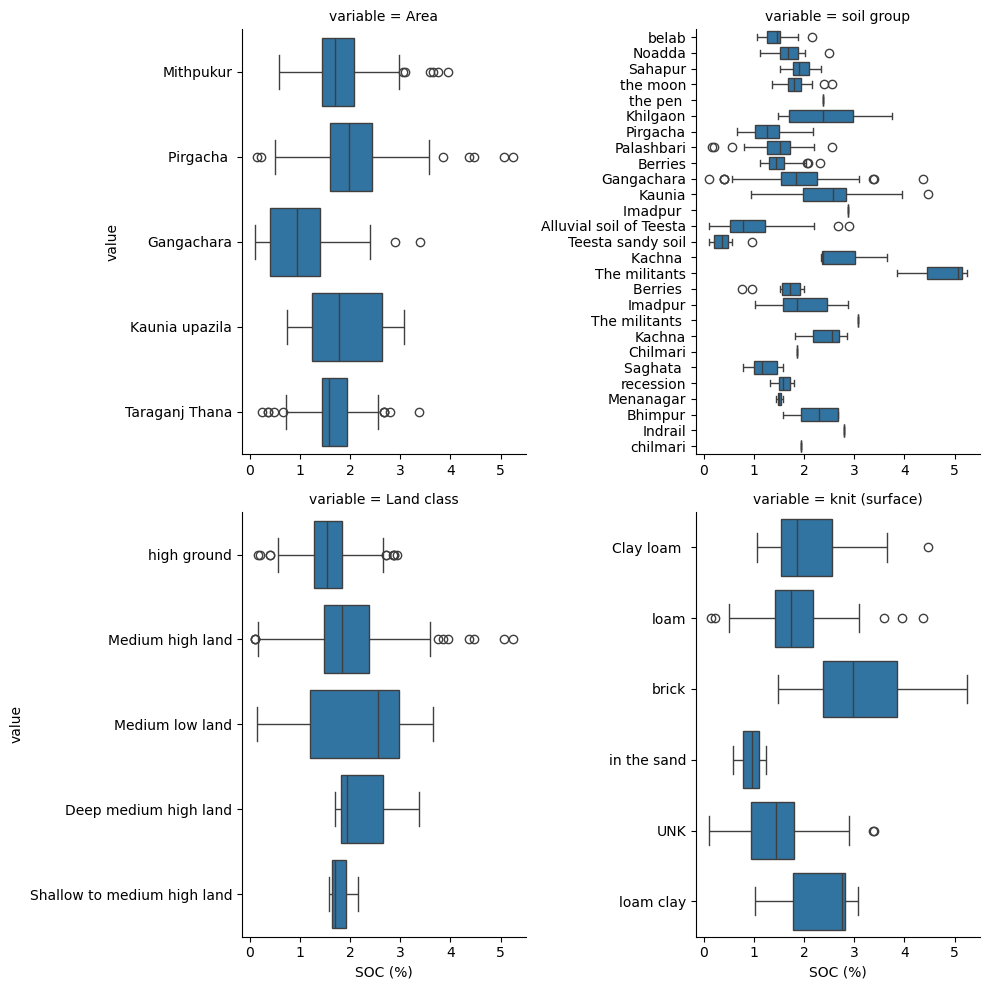

In [63]:
g = sns.FacetGrid(melt_df_by_cat_cols, col="variable", sharey=False, sharex=False, aspect=1, col_wrap=2, height=5)
g.map(sns.boxplot, "SOC (%)","value")
# g.set_xticklabels(rotation=15)

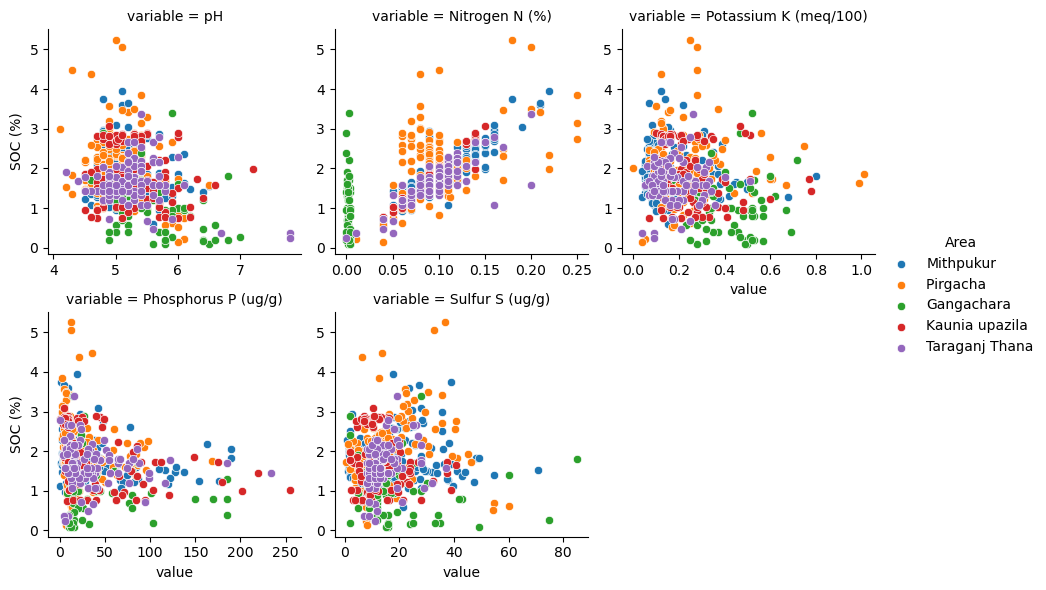

In [64]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", hue = 'Area', sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "SOC (%)")
g.add_legend()

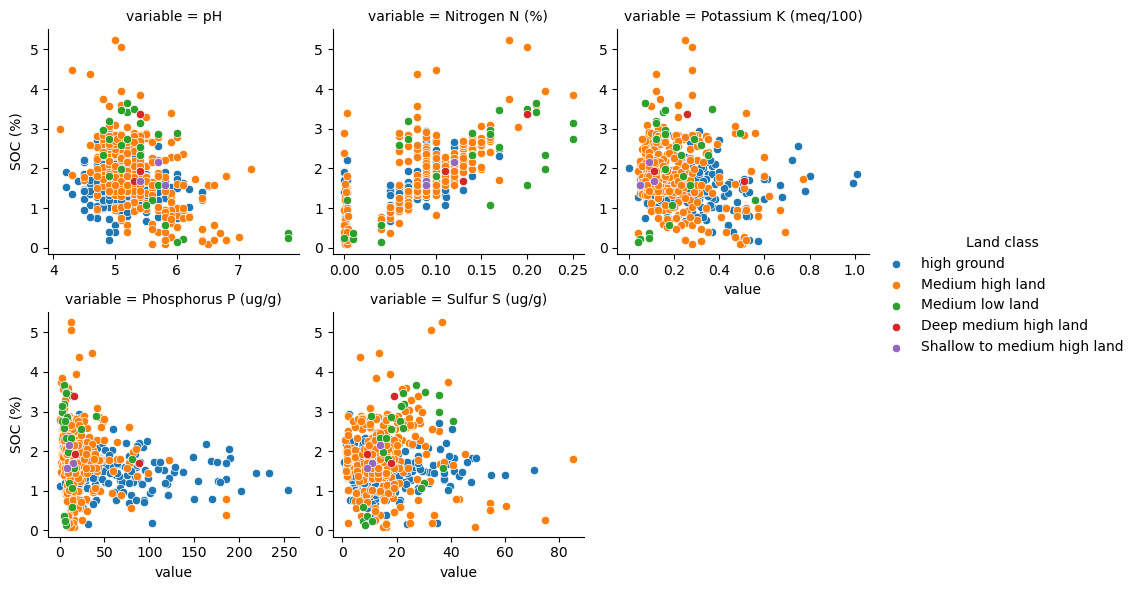

In [65]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", hue = 'Land class', sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "SOC (%)")
g.add_legend()

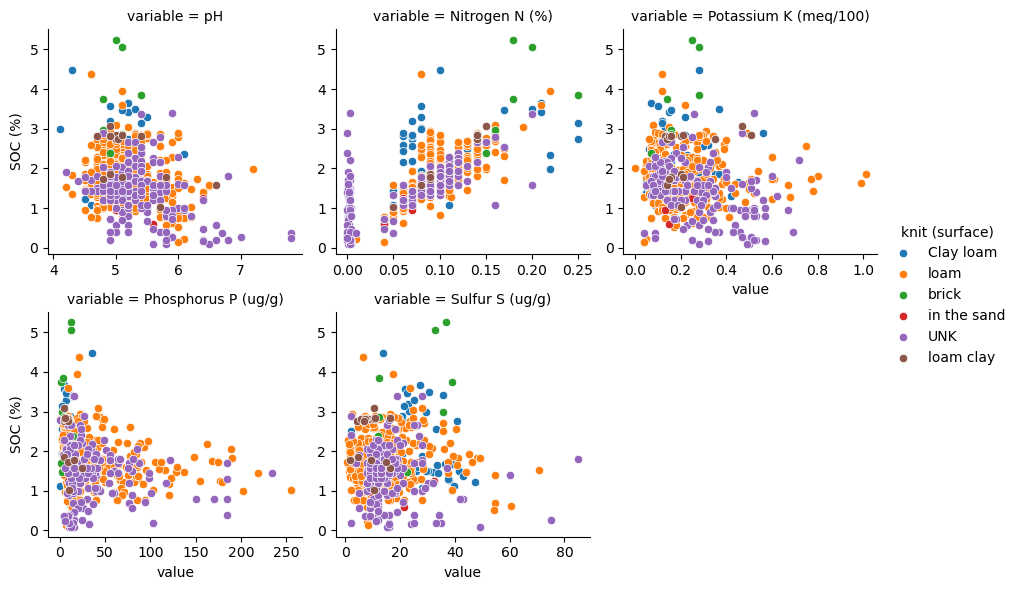

In [66]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", hue = 'knit (surface)', sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "SOC (%)")
g.add_legend()

## The relationship between independent variables and Boron (ug/g)

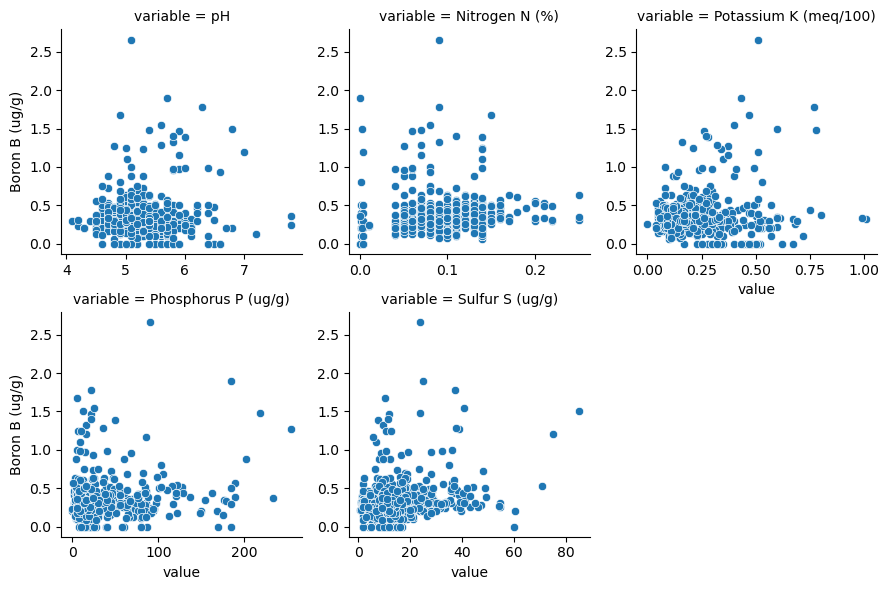

In [67]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", 'Boron B (ug/g)')

/Users/cpor0006/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


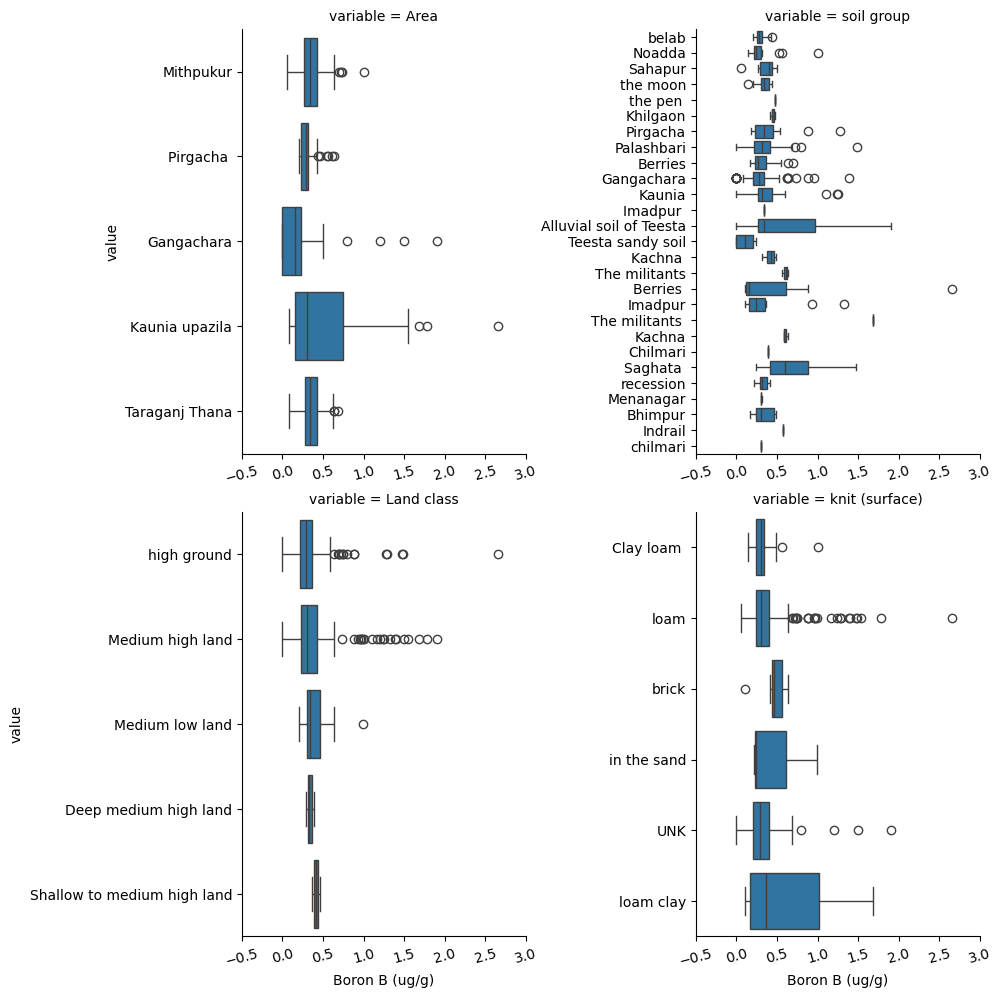

In [68]:
g = sns.FacetGrid(melt_df_by_cat_cols, col="variable", sharey=False, sharex=False, aspect=1, col_wrap=2, height=5)
g.map(sns.boxplot, 'Boron B (ug/g)',"value")
g.set_xticklabels(rotation=15)

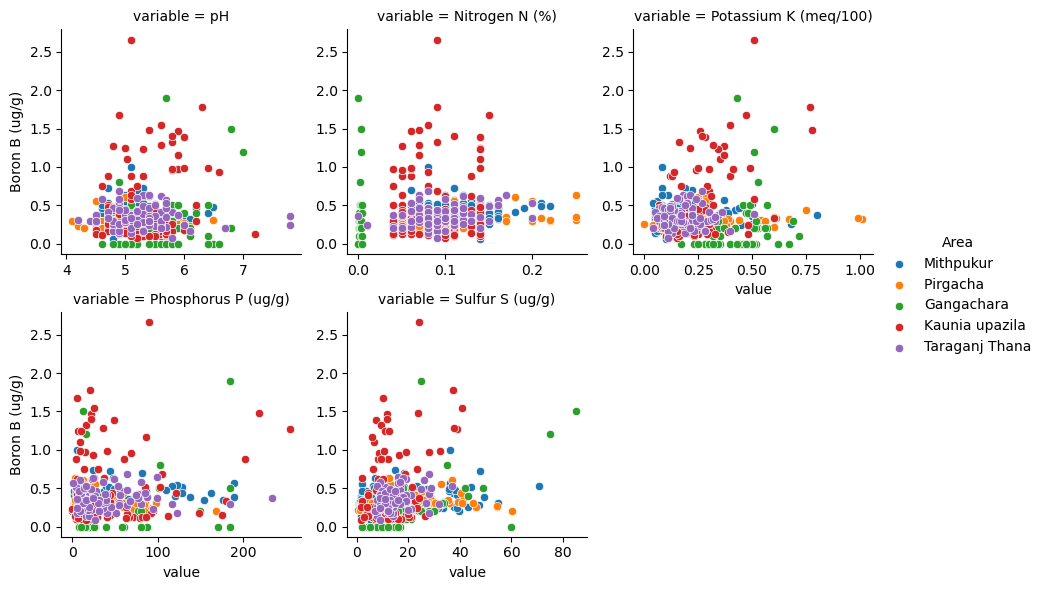

In [69]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", hue = 'Area', sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "Boron B (ug/g)")
g.add_legend()

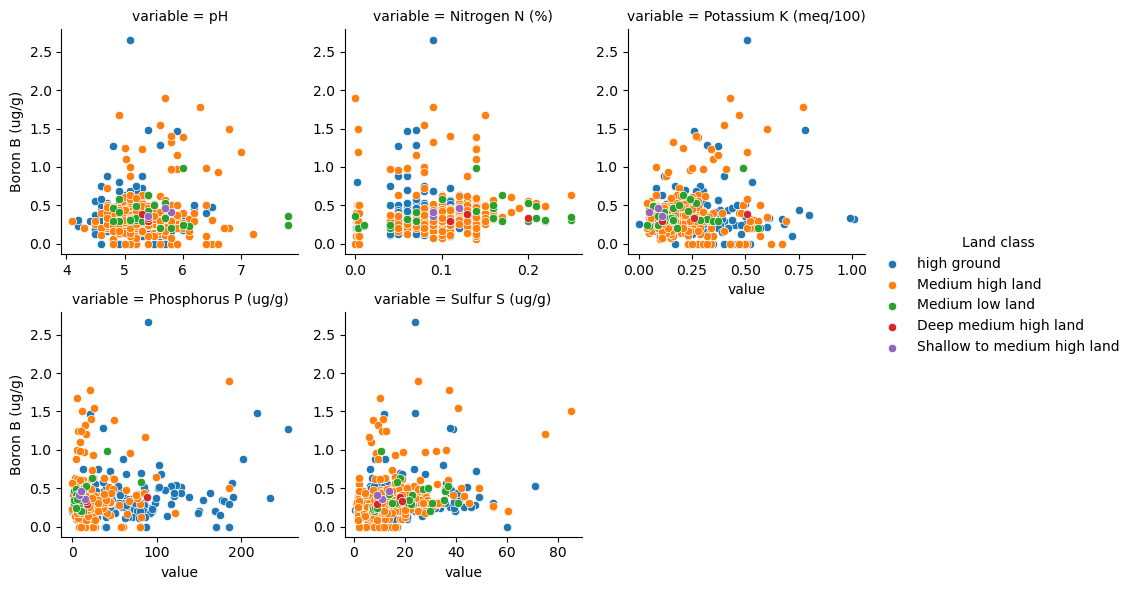

In [70]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", hue = 'Land class', sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "Boron B (ug/g)")
g.add_legend()

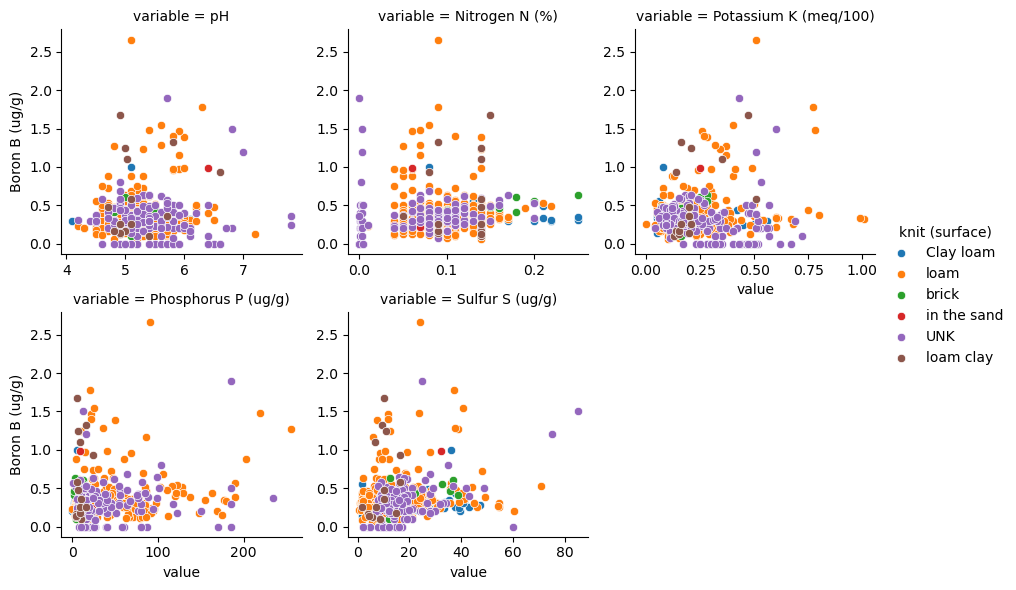

In [71]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", hue = 'knit (surface)', sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "Boron B (ug/g)")
g.add_legend()

## The relationship between independent variables and Zinc (ug/g)

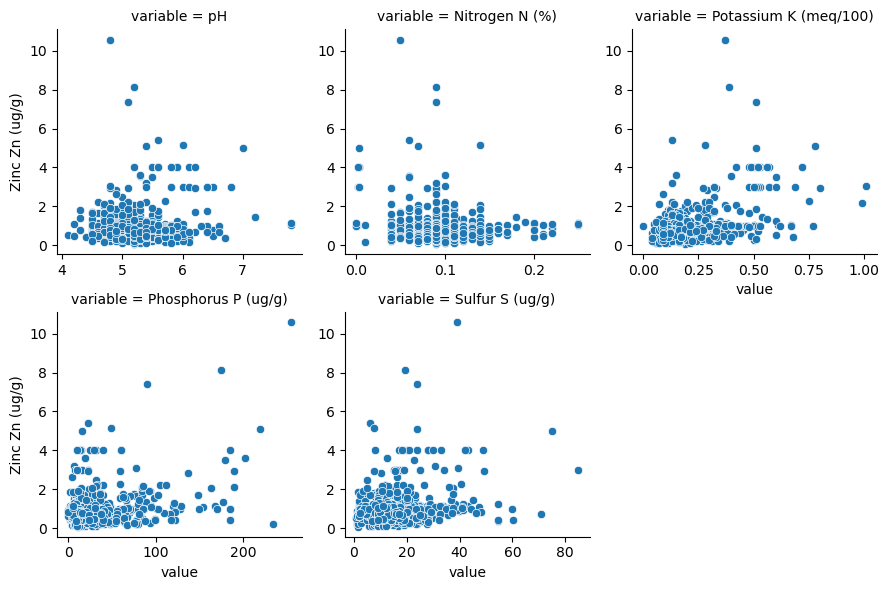

In [72]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", 'Zinc Zn (ug/g)')

/Users/cpor0006/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


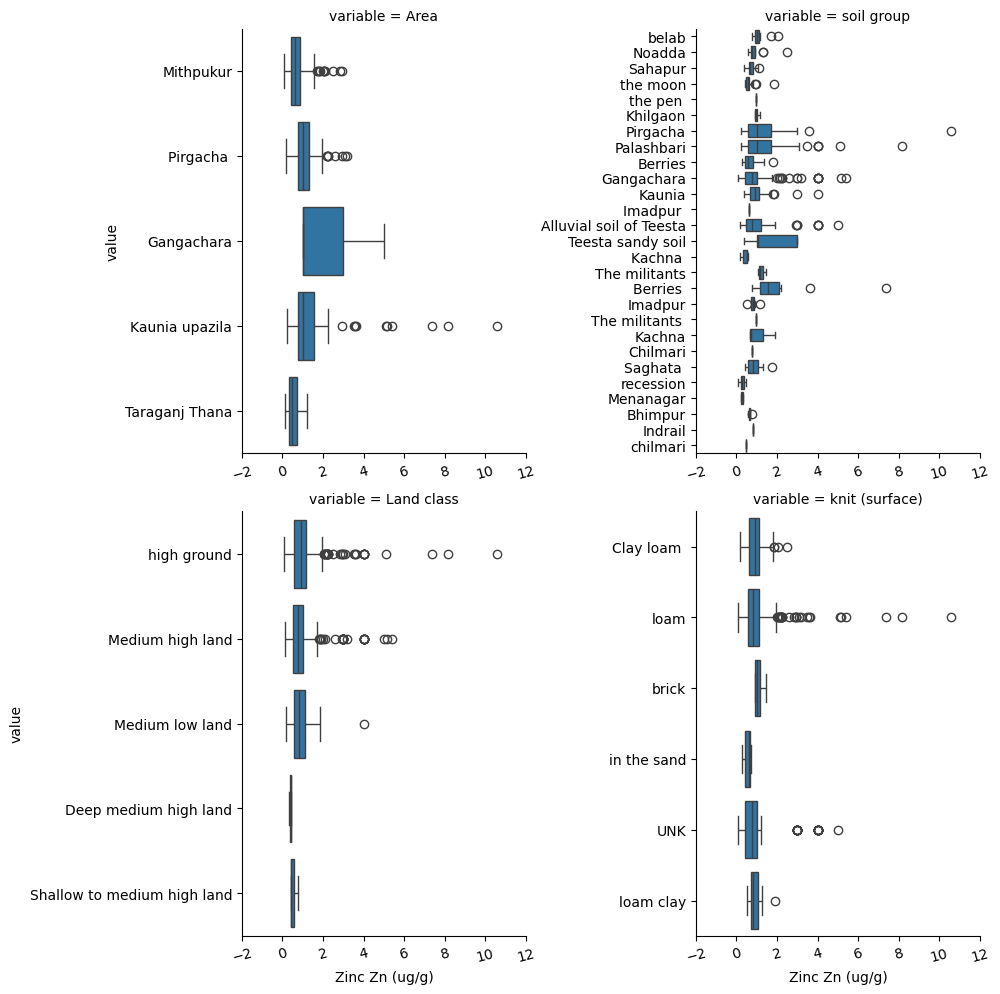

In [73]:
g = sns.FacetGrid(melt_df_by_cat_cols, col="variable", sharey=False, sharex=False, aspect=1, col_wrap=2, height=5)
g.map(sns.boxplot, 'Zinc Zn (ug/g)',"value")
g.set_xticklabels(rotation=15)

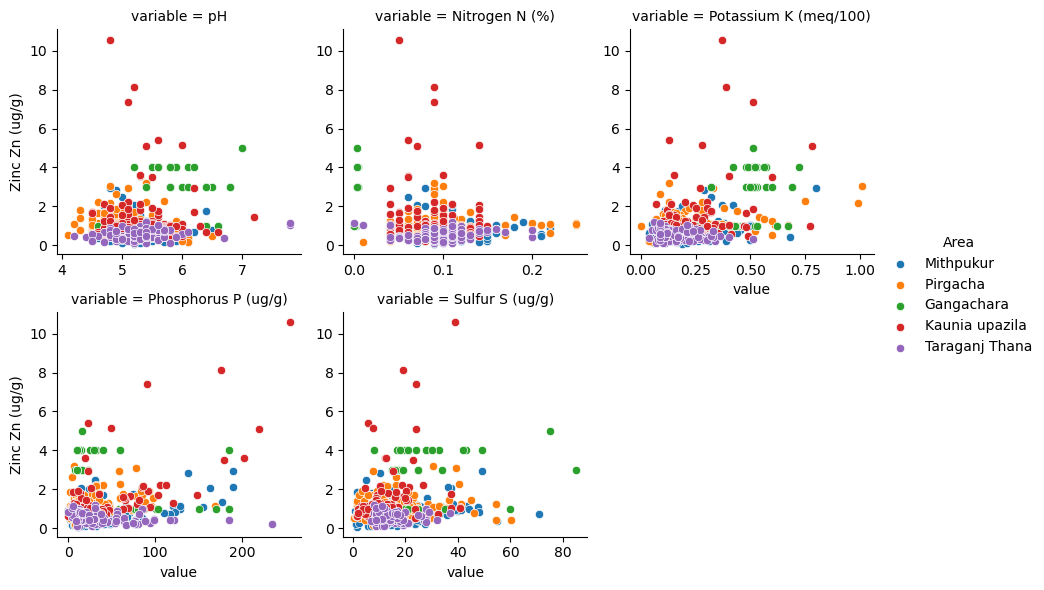

In [74]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", hue = 'Area', sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "Zinc Zn (ug/g)")
g.add_legend()

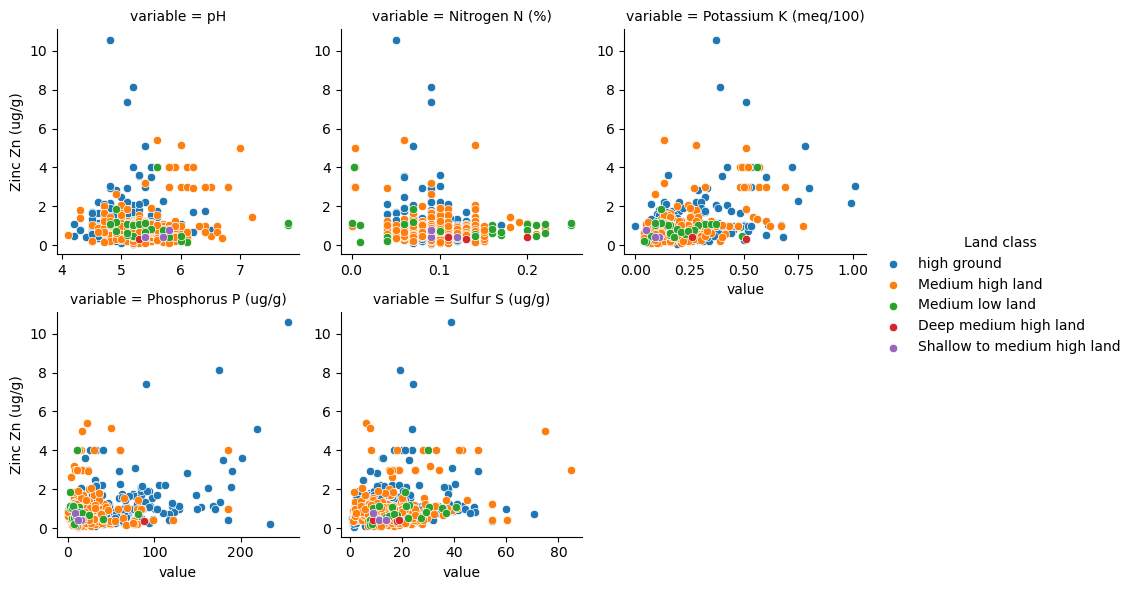

In [75]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", hue = 'Land class', sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "Zinc Zn (ug/g)")
g.add_legend()

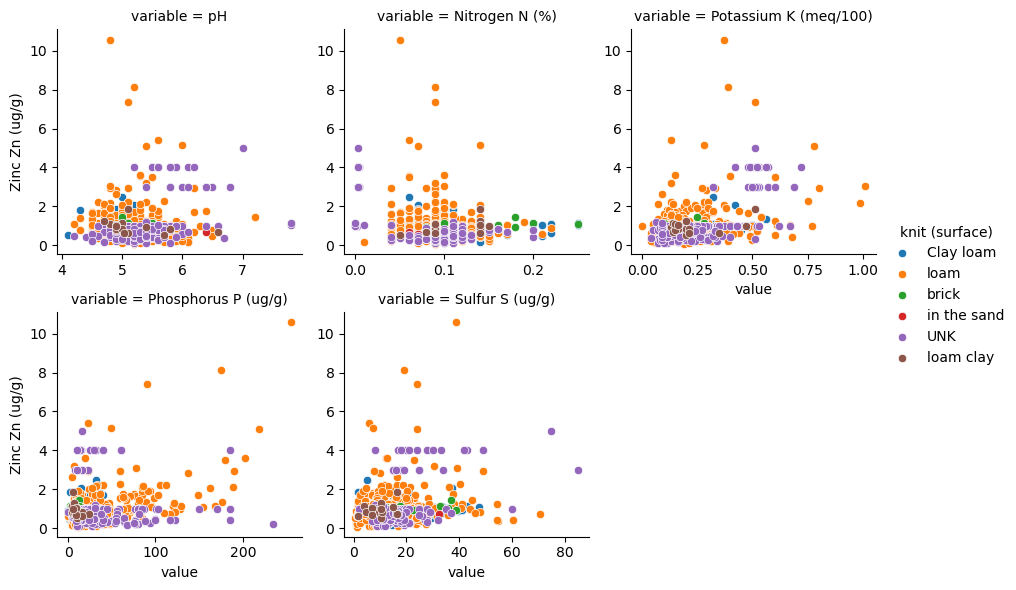

In [76]:
g = sns.FacetGrid(melt_df_by_num_cols, col="variable", hue = 'knit (surface)', sharey=False, sharex=False, col_wrap=3)
g.map(sns.scatterplot,"value", "Zinc Zn (ug/g)")
g.add_legend()